## Observations and Measurements 


### Done By: IMT2019525 VIJAY JAISANKAR

#### Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

#### Let's take the values found after executing the python files

In [4]:
names_of_trace_files = ['gcc','gzip','mcf','swim','twolf']

dm_cache_hit_rates = [0.958346503569053,0.6670720349905622,0.010379109772699147,0.9343190640944876,0.988442993720279]
dm_cache_miss_rates = [(1 - x) for x in dm_cache_hit_rates]
dm_cache_hitmiss_ratio = [23.007588454376165,2.00365275705107,0.010487965518103829,14.225118007431957,85.52759856630824]

sa_cache_hit_rates = [0.9382799122716863,0.6670554044952229,0.010325481622045295,0.9262252096849202,0.9876145344887578]
sa_cache_miss_rates = [(1 - x) for x in sa_cache_hit_rates]
sa_cache_hitmiss_ratio = [15.202180470026391,2.003502725382584,0.010433209535361618,12.554765736766809,79.73979933110368]

#### Let's plot these values for the DM Cache

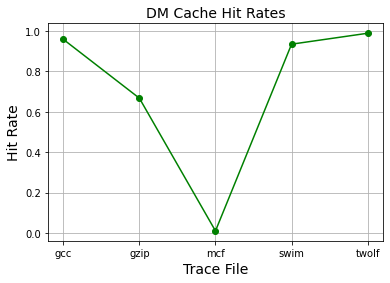

In [5]:
plt.plot(names_of_trace_files, dm_cache_hit_rates, color='green', marker='o')
plt.title('DM Cache Hit Rates', fontsize=14)
plt.xlabel('Trace File', fontsize=14)
plt.ylabel('Hit Rate', fontsize=14)
plt.grid(True)
plt.show()

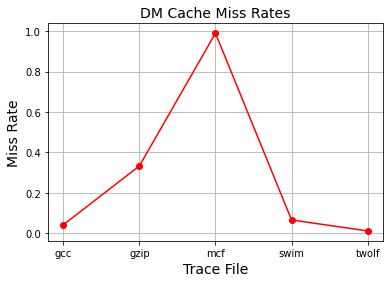

In [6]:
plt.plot(names_of_trace_files, dm_cache_miss_rates, color='red', marker='o')
plt.title('DM Cache Miss Rates', fontsize=14)
plt.xlabel('Trace File', fontsize=14)
plt.ylabel('Miss Rate', fontsize=14)
plt.grid(True)
plt.show()

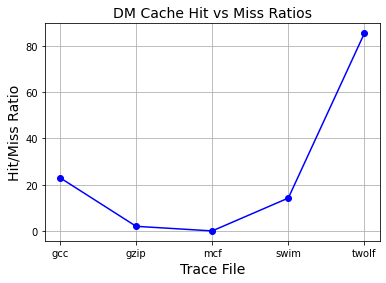

In [7]:
plt.plot(names_of_trace_files, dm_cache_hitmiss_ratio, color='blue', marker='o')
plt.title('DM Cache Hit vs Miss Ratios', fontsize=14)
plt.xlabel('Trace File', fontsize=14)
plt.ylabel('Hit/Miss Ratio', fontsize=14)
plt.grid(True)
plt.show()

#### Observations:

We see that the DM Cache does pretty well for ``` gcc,swim and twolf ```, each having a hit rate above 90%.  
It is abysmal, however, for ```mcf```.   
We see that it has the best accuracy for ```twolf```, when measured by any metric. This effect is most profound in the dm cache hit/miss ratios graph

#### Let's proceed to the SA Cache implementation

Before we proceed to the graphs, let's take a closer look at the replacement algorithm.

In [8]:
def updateCache(addr):
        l = sortTheAddress(addr)
        tag = l[0] # Gets the tag bits of the given address
        decimalIndex = l[1] # Gets the integer index of the given address
        listOfWays = indexLists[decimalIndex] # Gets the list of ways at that index
        
        # We check for a hit, by iterating through the ways and checking for tag match and valid bit set
        for i in range(numberOfWays):
            originalTag = listOfWays[i].getTag()
            val = listOfWays[i].getValid()
            if originalTag == tag and val == 1: #Tag match and valid set check
                numHits+=1 
                return 
        # If not matched, we seek to evict the first 'empty' entry : The FIFO policy
        for i in range(numberOfWays):
            originalTag = listOfWays[i].getTag()
            val = listOfWays[i].getValid()
            if originalTag == None or val == 0: # The empty entry
                numMiss+=1
                indexLists[decimalIndex][i].setTag(tag) # Updating that entry
                indexLists[decimalIndex][i].setValid(1)
                return 
        # Else, if none of these cases hold i.e All are filled, we evict and replace the first way as it was the first in.
        self._indexLists[decimalIndex][0].setTag(tag) 
        self._indexLists[decimalIndex][0].setValid(1)
        self._numMiss += 1

#### So, we see that this is a FIFO Cache Replacement Algorithm 

Let's see how this stacks up against the DM Cache.

First, let's graph the standalone performance

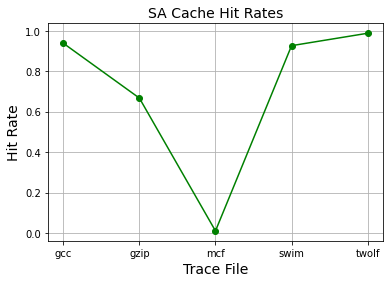

In [9]:
plt.plot(names_of_trace_files, sa_cache_hit_rates, color='green', marker='o')
plt.title('SA Cache Hit Rates', fontsize=14)
plt.xlabel('Trace File', fontsize=14)
plt.ylabel('Hit Rate', fontsize=14)
plt.grid(True)
plt.show()

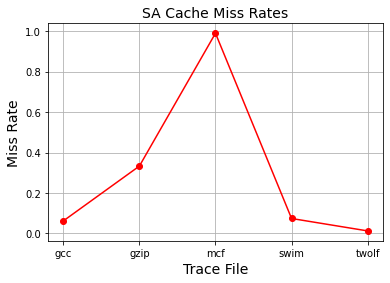

In [10]:
plt.plot(names_of_trace_files, sa_cache_miss_rates, color='red', marker='o')
plt.title('SA Cache Miss Rates', fontsize=14)
plt.xlabel('Trace File', fontsize=14)
plt.ylabel('Miss Rate', fontsize=14)
plt.grid(True)
plt.show()

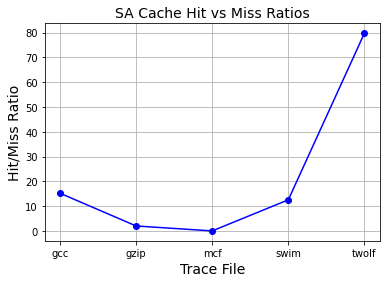

In [11]:
plt.plot(names_of_trace_files, sa_cache_hitmiss_ratio, color='blue', marker='o')
plt.title('SA Cache Hit vs Miss Ratios', fontsize=14)
plt.xlabel('Trace File', fontsize=14)
plt.ylabel('Hit/Miss Ratio', fontsize=14)
plt.grid(True)
plt.show()

#### Observations:

We see that the SA Cache, just like the DM cache, does pretty well for ``` gcc,swim and twolf ```, each having a hit rate above 90%.  
It is again abysmal for ```mcf```.   
We see that it has the best accuracy for ```twolf```, when measured by any metric. This effect is most profound in the dm cache hit/miss ratios graph. The difference is *even more pronounced* here

#### Let's now compare the SA and DM caches

First, let's compare average values

In [12]:
import numpy as np
def get_average_value_of_a_list(l):
    array = np.array(l)
    return np.mean(array)

In [13]:
dm_hit = get_average_value_of_a_list(dm_cache_hit_rates)
dm_miss = get_average_value_of_a_list(dm_cache_miss_rates)
dm_hm = get_average_value_of_a_list(dm_cache_hitmiss_ratio)

sa_hit = get_average_value_of_a_list(sa_cache_hit_rates)
sa_miss = get_average_value_of_a_list(sa_cache_miss_rates)
sa_hm = get_average_value_of_a_list(sa_cache_hitmiss_ratio)


In [14]:
dm_hit

0.7117119412294162

In [15]:
sa_hit

0.7059001085125265

#### We see that the DM cache performs better than SA cache in terms of hit rate, and obviously miss rate too (on average)

In [16]:
dm_hm

24.95488915013711

In [17]:
sa_hm

21.90213629456297

#### We see that the DM cache performs better than SA cache in terms of hit/miss ratio too(on average)

#### Let's now plot the graphs for both of the caches

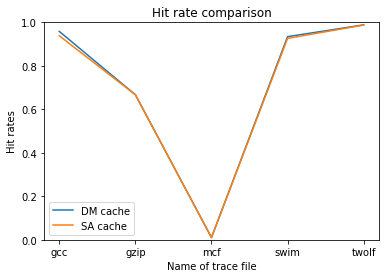

In [20]:
x1 = names_of_trace_files
y1 = dm_cache_hit_rates
plt.plot(x1, y1, label = "DM cache")
x2 = names_of_trace_files
y2 = sa_cache_hit_rates
plt.plot(x2, y2, label = "SA cache")
plt.xlabel('Name of trace file')
plt.ylabel('Hit rates')
plt.title('Hit rate comparison')
plt.legend()
plt.ylim(0.0, 1.0)
plt.show()

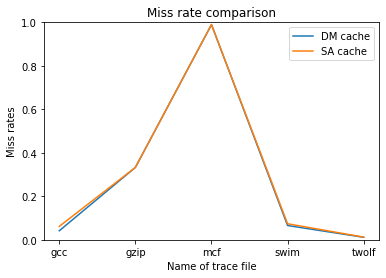

In [21]:
x1 = names_of_trace_files
y1 = dm_cache_miss_rates
plt.plot(x1, y1, label = "DM cache")
x2 = names_of_trace_files
y2 = sa_cache_miss_rates
plt.plot(x2, y2, label = "SA cache")
plt.xlabel('Name of trace file')
plt.ylabel('Miss rates')
plt.title('Miss rate comparison')
plt.legend()
plt.ylim(0.0, 1.0)
plt.show()

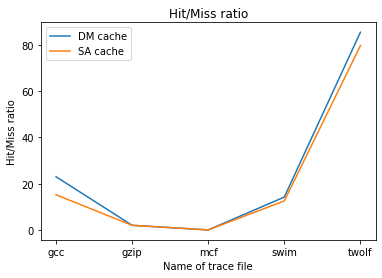

In [24]:
x1 = names_of_trace_files
y1 = dm_cache_hitmiss_ratio
plt.plot(x1, y1, label = "DM cache")
x2 = names_of_trace_files
y2 = sa_cache_hitmiss_ratio
plt.plot(x2, y2, label = "SA cache")
plt.xlabel('Name of trace file')
plt.ylabel('Hit/Miss ratio')
plt.title('Hit/Miss ratio')
plt.legend()
plt.show()

#### Observations:

- We see that DM cache has a higher hit rate, lower miss rate and higher hit/miss ratio than SA cache with FIFO policy 
- We need to improve our algorithm for SA cache; round robin and fifo do not cut it
- Both perform poorly for mcf trace file